Problem 3)
Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child
mortality over time. How does each measure change over time within each continent?
Interpret your visualizations, noting any trends and/or outliers.

We can see in all the plots that for every continent the income increases over time with almost a smooth curve except for Asia. we also see that with the increase in income there is also an increase in life expectancy rate and decrease in child mortality rate. This trend basically means with the increase in income per person the quality of life people live becomes better. Also, around 1920s we see that there is a sharp downfall of life expectancy for all continent this may be because there might be no data for that time period or may be its just some outlier.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
import seaborn as sns


In [2]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"
gdp_table = pd.read_csv(data_point_path + "income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [3]:
gdp_table = gdp_table.rename(columns={"geo": "country"})

In [4]:
raw = pd.merge(gdp_table, country_table, on='country', how='left')
raw = raw.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "Income", 
                          "time": "Year", 
                          "name": "Name",
                          "world_4region": "Continent"})
raw.head(5)

,country,Year,Income,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,...,latitude,longitude,main_religion_2008,Name,pandg,un_state,unicode_region_subtag,upper_case_name,Continent,world_6region
0,afg,1800,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,afg,1801,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,afg,1802,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,afg,1803,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,afg,1804,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [5]:
child_mortality = pd.read_csv(data_point_path +\
                              "child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv")
child_mortality = child_mortality.rename(columns={"geo": "country",\
                            "child_mortality_0_5_year_olds_more_years_version_7" : "child_mortality"})
raw = pd.merge(raw, child_mortality,  how='left', left_on=['country','Year'], right_on = ['country','time'])
raw.head(2)

,country,Year,Income,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,...,main_religion_2008,Name,pandg,un_state,unicode_region_subtag,upper_case_name,Continent,world_6region,time,child_mortality
0,afg,1800,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia,1800.0,468.6
1,afg,1801,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia,1801.0,468.6


In [6]:
life_expectancy = pd.read_csv(data_point_path +\
                              "life_expectancy_years--by--geo--time.csv")
life_expectancy = life_expectancy.rename(columns={"geo": "country",\
                            "time" : "Year"})
life_expectancy.head()
raw = pd.merge(raw, life_expectancy,  how='left', left_on=['country','Year'], right_on = ['country','Year'])
raw.head(2)


,country,Year,Income,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,...,Name,pandg,un_state,unicode_region_subtag,upper_case_name,Continent,world_6region,time,child_mortality,life_expectancy_years
0,afg,1800,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia,1800.0,468.6,28.21
1,afg,1801,603,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia,1801.0,468.6,28.20


In [7]:
raw = raw[["Year", "country", "Name", "Continent", "Income", "child_mortality", "life_expectancy_years"]]
# raw[['child_mortality', "life_expectancy_years"]] =\
#     raw[['child_mortality', "life_expectancy_years"]].fillna(value=0)

In [8]:
raw.head()

,Year,country,Name,Continent,Income,child_mortality,life_expectancy_years
0,1800,afg,Afghanistan,asia,603,468.6,28.21
1,1801,afg,Afghanistan,asia,603,468.6,28.20
2,1802,afg,Afghanistan,asia,603,468.6,28.19
3,1803,afg,Afghanistan,asia,603,468.6,28.18
4,1804,afg,Afghanistan,asia,603,468.6,28.17


In [9]:
continent_df = raw[["Year", "Continent", "Income", "child_mortality", "life_expectancy_years"]]\
    .groupby(["Year", "Continent"]).mean().reset_index()
continent_df.head()

,Year,Continent,Income,child_mortality,life_expectancy_years
0,1800,africa,626.740741,439.098148,30.523519
1,1800,americas,1028.228571,428.800000,31.775152
2,1800,asia,845.403509,444.847170,29.193396
3,1800,europe,1380.276596,379.197727,35.284091
4,1801,africa,627.296296,438.755769,30.397778


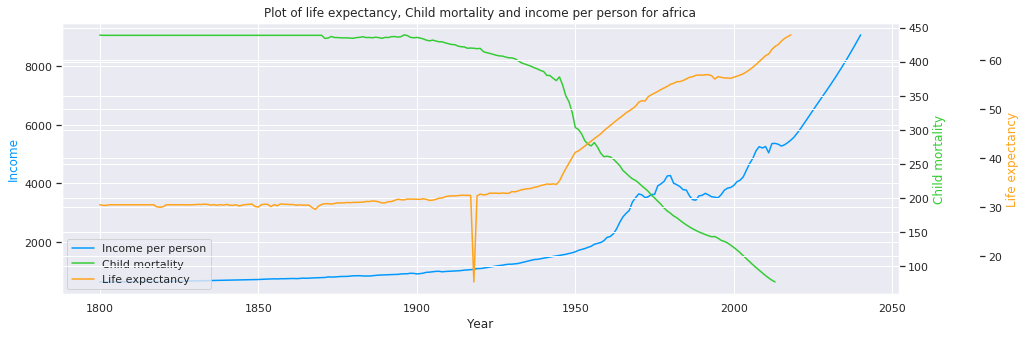

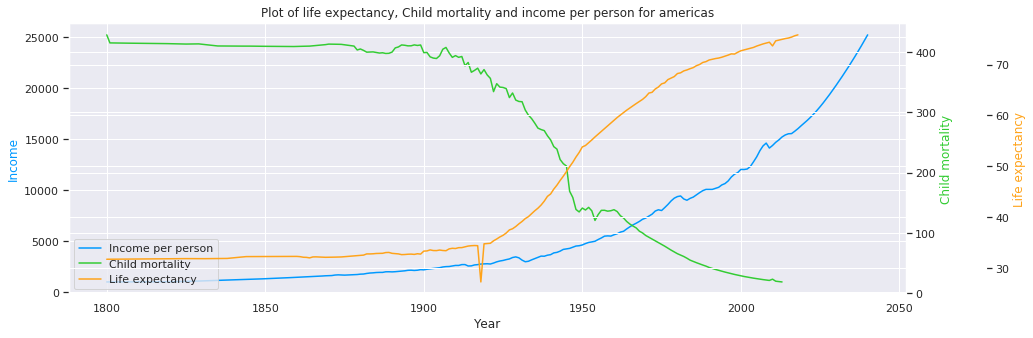

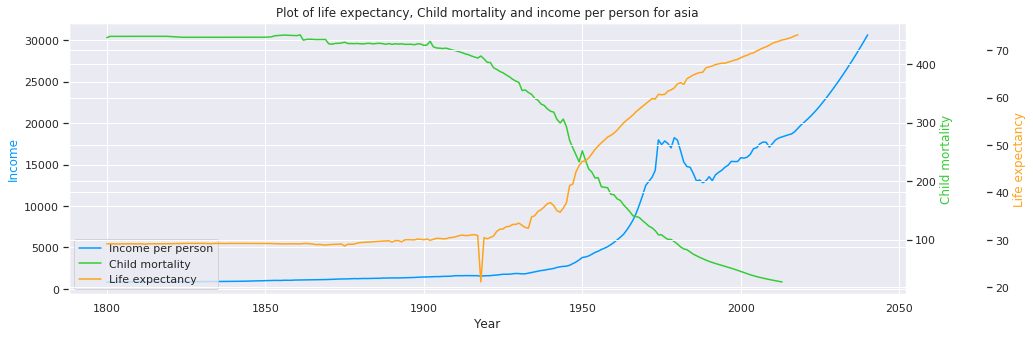

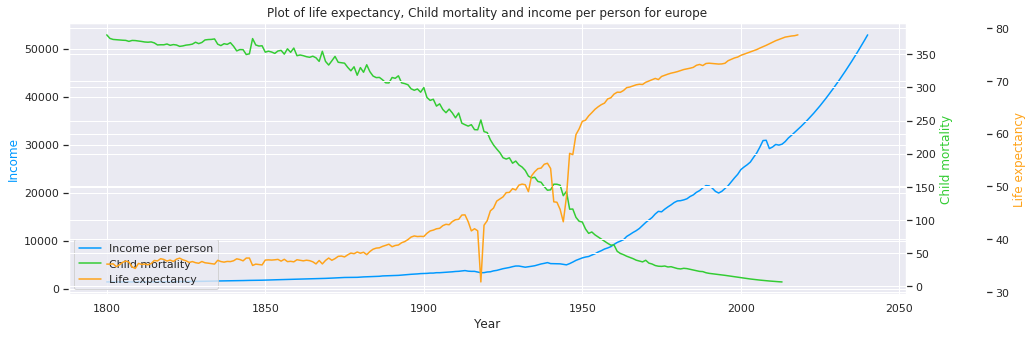

In [10]:
# [reference Link] : https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

for Continent in list(continent_df["Continent"].unique()):
    cdf = continent_df[continent_df["Continent"] == Continent]

    sns.set(rc={'figure.figsize':(15,5)})

    fig = plt.figure()
    host = fig.add_subplot(111)
    host.set_title("Plot of life expectancy, Child mortality and income per person for " + Continent)

    par1 = host.twinx()
    par2 = host.twinx()
    
    host.set_xlabel("Year")
    host.set_ylabel("Income")
    par1.set_ylabel("Child mortality")
    par2.set_ylabel("Life expectancy")
    
    p1, = host.plot(cdf["Year"], cdf["Income"], color="#0099ff",label="Income per person")
    p2, = par1.plot(cdf["Year"], cdf["child_mortality"], color="#33cc33", label="Child mortality")
    p3, = par2.plot(cdf["Year"], cdf["life_expectancy_years"], color="#ffa31a", label="Life expectancy")

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='lower left')
    par2.spines['right'].set_position(('outward', 80))
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.show()